In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
 
# Read Image to be aligned
imgTest = cv2.imread('/content/WhatsApp Image 2023-01-10 at 06.23.42.jpeg')
# Reference Reference image or Ideal image
imgRef = cv2.imread('/content/drive/MyDrive/IDs/ID/f06.jpg')

In [ ]:
imgRef

array([[[ 59,  62,  66],
        [ 59,  62,  66],
        [ 59,  62,  66],
        ...,
        [ 46,  41,  38],
        [ 46,  41,  38],
        [ 46,  41,  38]],

       [[ 59,  62,  66],
        [ 59,  62,  66],
        [ 59,  62,  66],
        ...,
        [ 48,  43,  40],
        [ 48,  43,  40],
        [ 48,  43,  40]],

       [[ 59,  62,  66],
        [ 59,  62,  66],
        [ 59,  62,  66],
        ...,
        [ 49,  44,  41],
        [ 49,  44,  41],
        [ 49,  44,  41]],

       ...,

       [[127, 143, 155],
        [127, 143, 155],
        [129, 143, 155],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[128, 146, 157],
        [128, 146, 157],
        [129, 145, 157],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[130, 148, 159],
        [130, 148, 159],
        [130, 146, 158],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]]

In [ ]:
imgTest_grey = cv2.cvtColor(imgTest, cv2.COLOR_BGR2GRAY)
imgRef_grey = cv2.cvtColor(imgRef, cv2.COLOR_BGR2GRAY)
height, width = imgRef_grey.shape

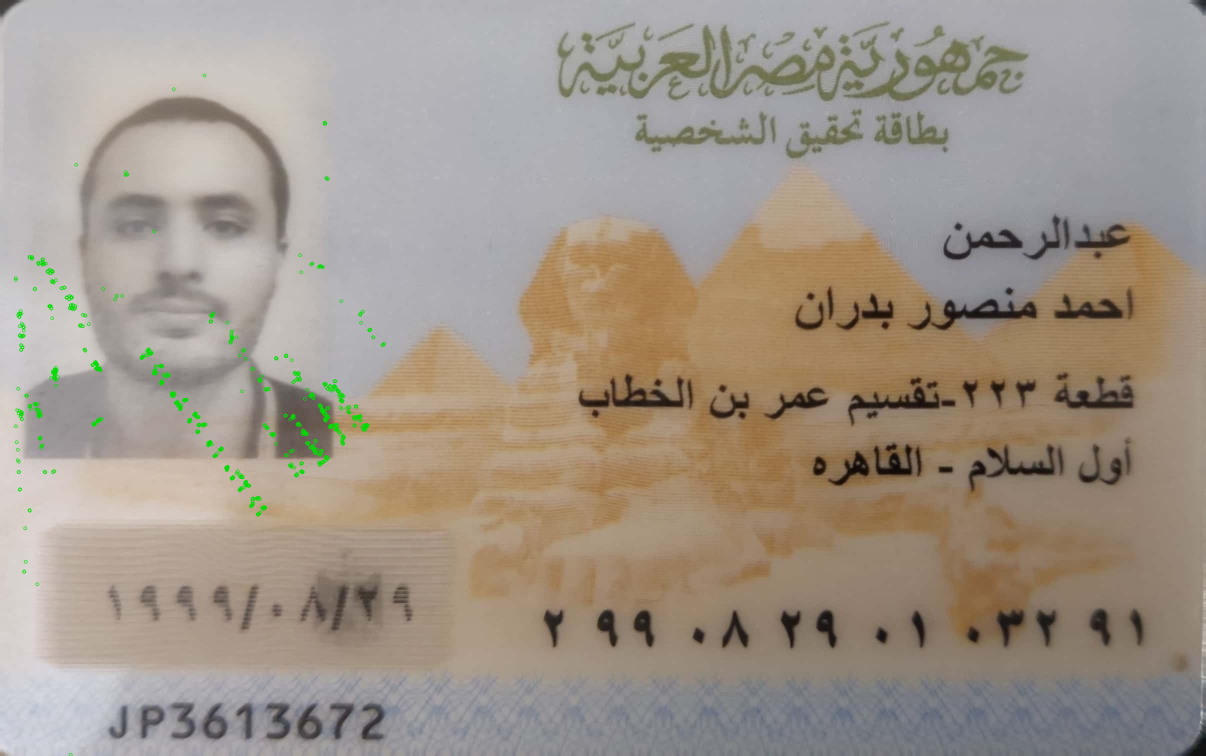

-1

In [ ]:
from google.colab.patches import cv2_imshow
orb_detector = cv2.ORB_create(1000)
 
# Extract key points and descriptors for both images
keyPoint1, des1 = orb_detector.detectAndCompute(imgTest_grey, None)
keyPoint2, des2 = orb_detector.detectAndCompute(imgRef_grey, None)
 
# Display keypoints for reference image in green color
imgKp_Ref = cv2.drawKeypoints(imgRef, keyPoint1, 0, (0,222,0), None)
imgKp_Ref = cv2.resize(imgKp_Ref, (width//2, height//2))
 
cv2_imshow(imgKp_Ref)
cv2.waitKey(0)

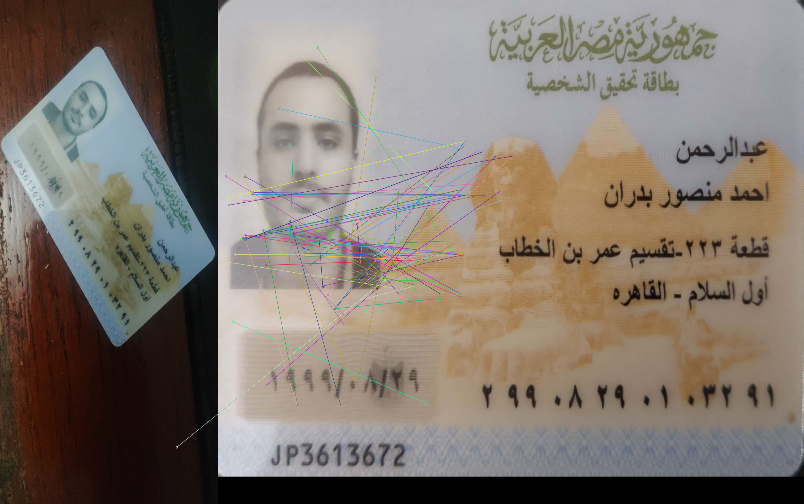

-1

In [ ]:
# Match features between two images using Brute Force matcher with Hamming distance
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
 
# Match the two sets of descriptors.
matches = matcher.match(des1, des2)
 
# Sort matches on the basis of their Hamming distance.
matches = sorted(matches,key=lambda x: x.distance)
 
# Take the top 90 % matches forward.
matches = matches[:int(len(matches) * 0.9)]
no_of_matches = len(matches)
 
# Display only 100 best matches {good[:100}
imgMatch = cv2.drawMatches(imgTest, keyPoint2, imgRef, keyPoint1, matches[:100], None, flags = 2)
imgMatch = cv2.resize(imgMatch, (width//3, height//3))
 
cv2_imshow(imgMatch)
cv2.waitKey(0)

In [ ]:
# Define 2x2 empty matrices
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))
 
# Storing values to the matrices
for i in range(len(matches)):
    p1[i, :] = keyPoint1[matches[i].queryIdx].pt
    p2[i, :] = keyPoint2[matches[i].trainIdx].pt
 
# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

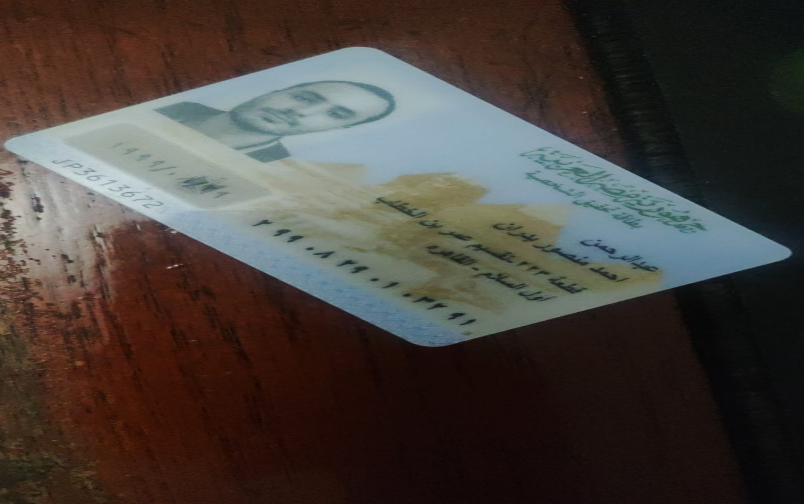

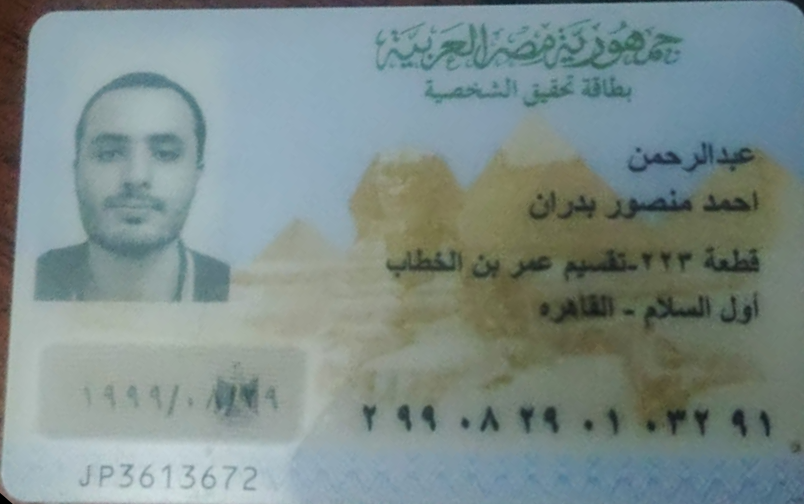

-1

In [ ]:

# Use homography matrix to transform the unaligned image wrt the reference image.
aligned_img = cv2.warpPerspective(imgTest, homography, (width, height))
# Resizing the image to display in our screen (optional)
aligned_img = cv2.resize(aligned_img, (width//3, height//3))
 
# Copy of input image
imgTest_cp = imgTest.copy()
imgTest_cp = cv2.resize(imgTest_cp, (width//3, height//3))
# Save the align image output.
# cv2.imwrite('output.jpg', aligned_img)
 
cv2_imshow(imgTest_cp)
cv2_imshow(aligned_img)
cv2.waitKey(0)

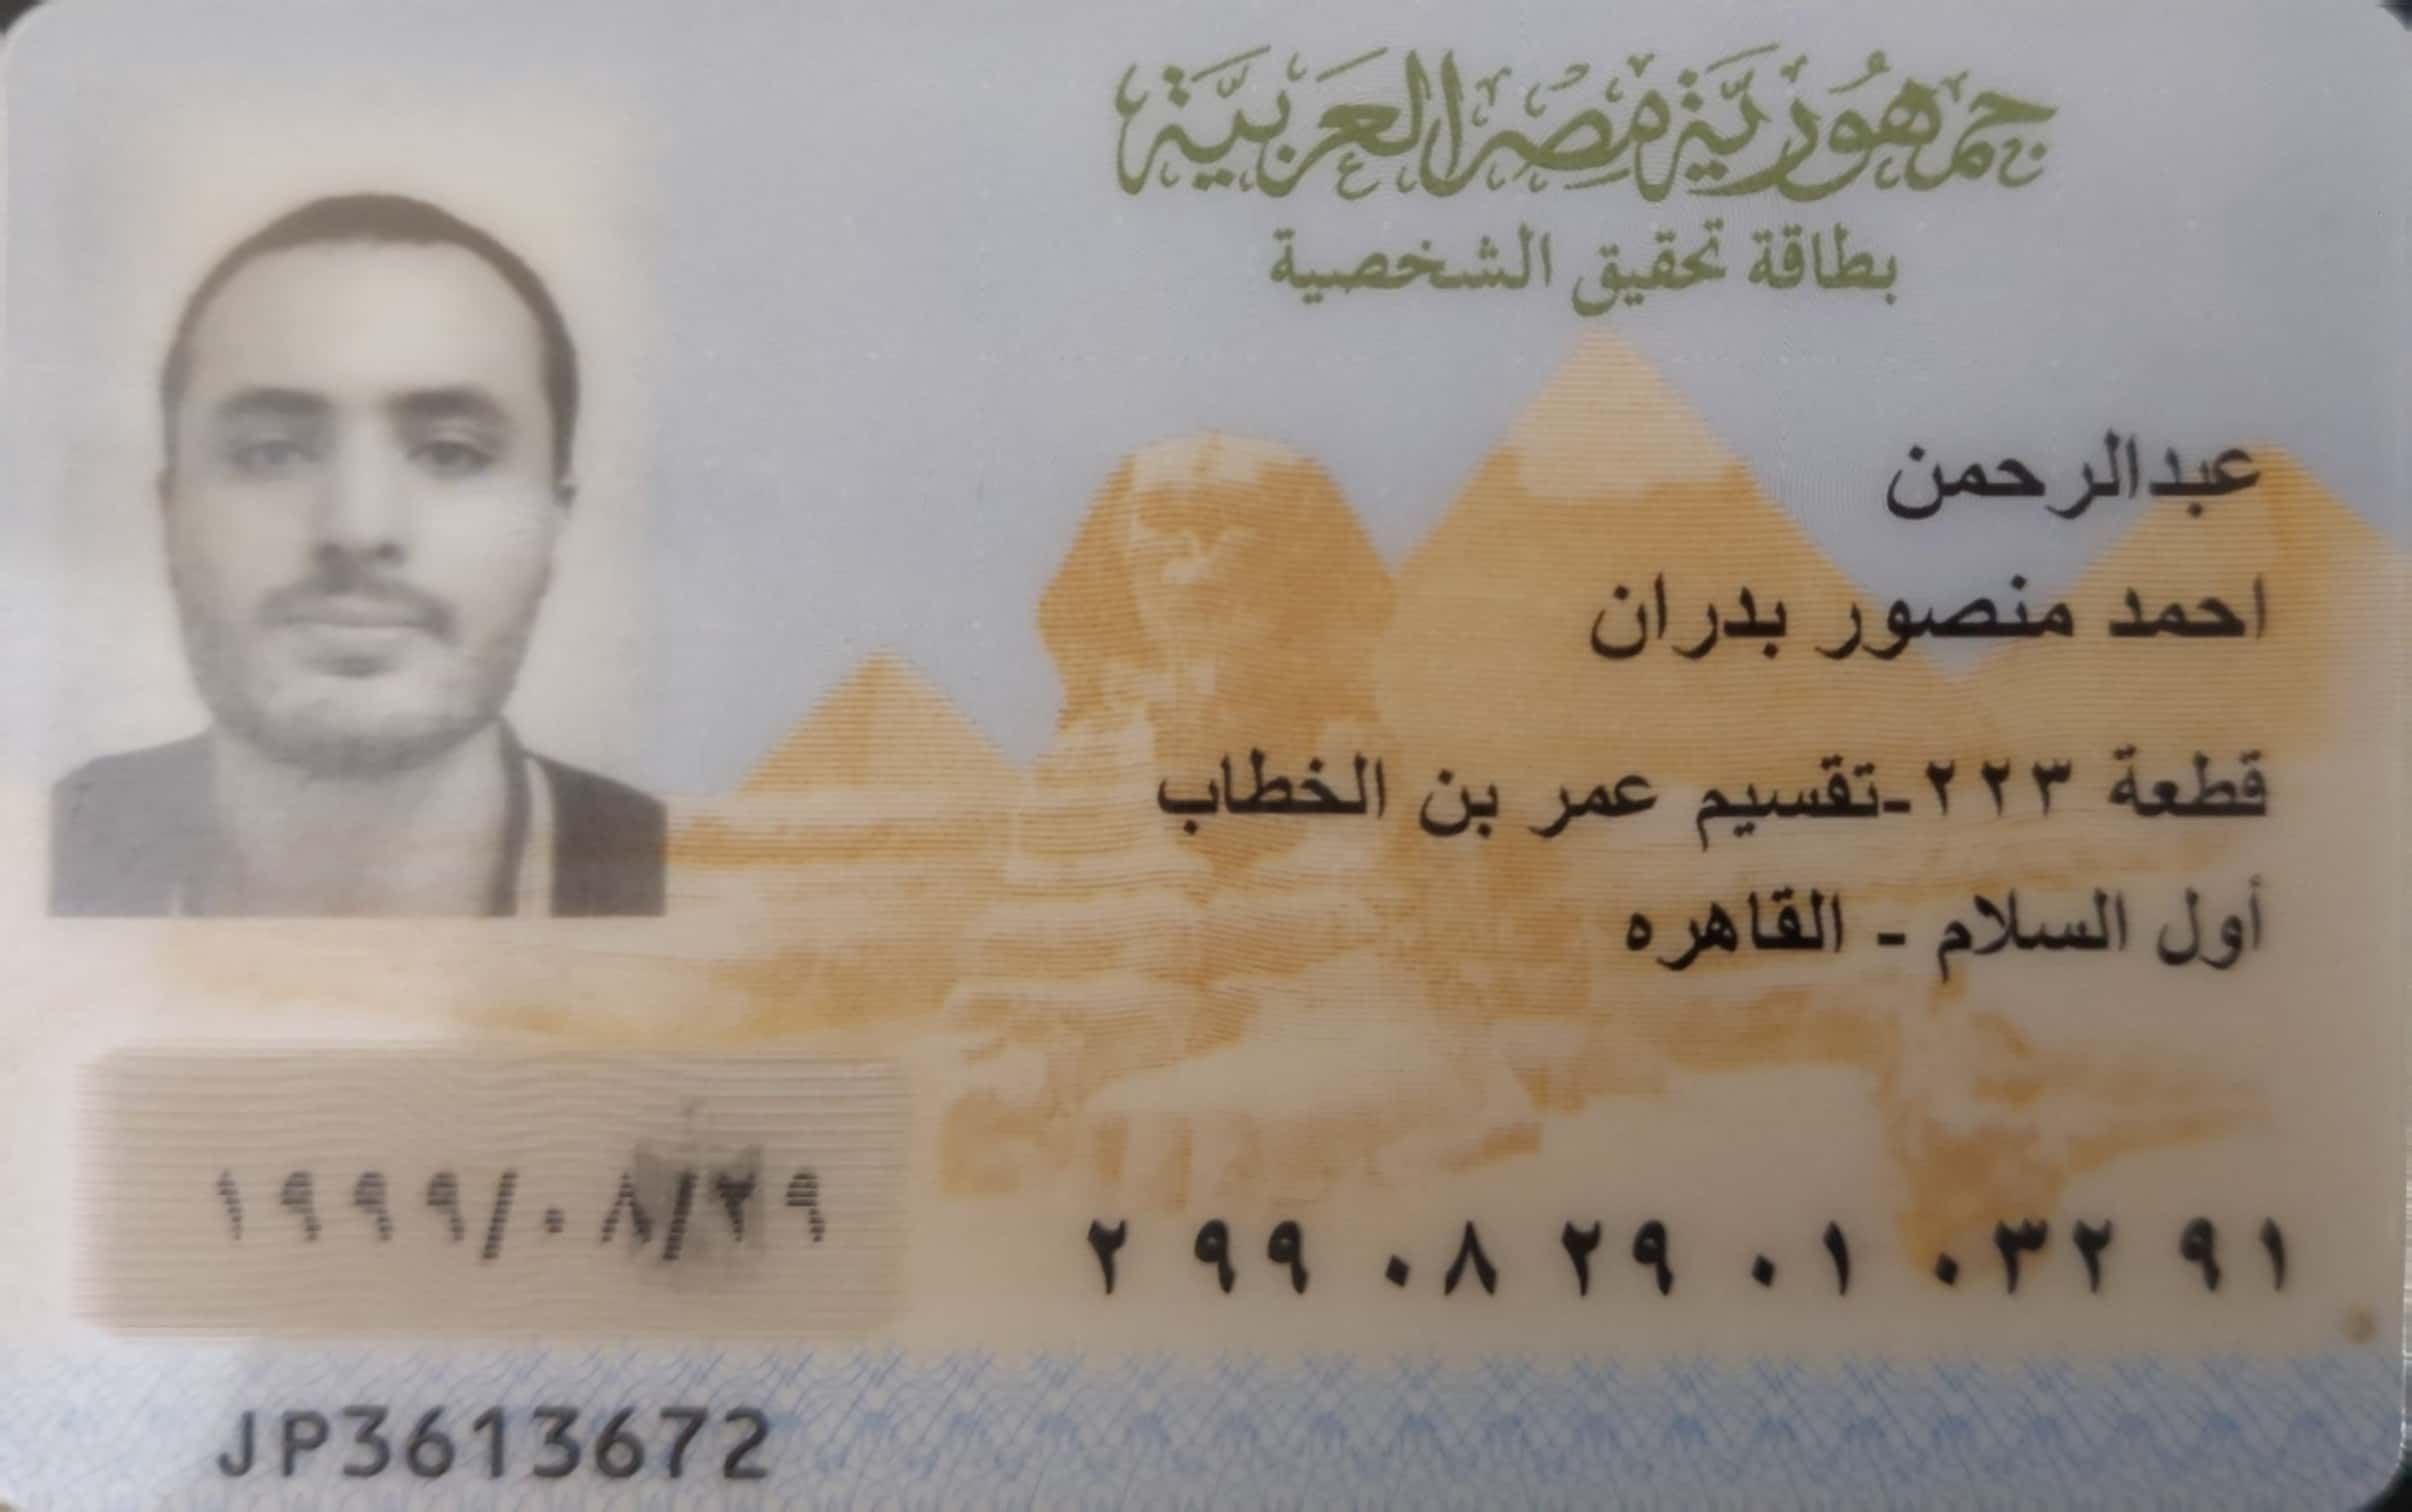

In [ ]:
cv2_imshow(imgRef)

**refernce** https://pyimagesearch.com/2020/08/31/image-alignment-and-registration-with-opencv/